In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
#from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
#from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [55]:
heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [56]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [57]:
heart_df = heart.copy()

In [58]:
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
heart_df.isnull().values.any()

False

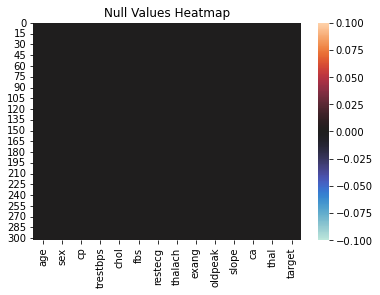

In [60]:
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

In [61]:
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [62]:
#Exploratory Data analysis and visualisation
#Distribution of target variable

In [63]:
heart_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [64]:
heart_df['target'].value_counts()/heart_df.shape[0]*100

1    54.455446
0    45.544554
Name: target, dtype: float64

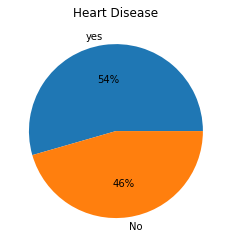

In [65]:
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

In [66]:
#Distribution of features

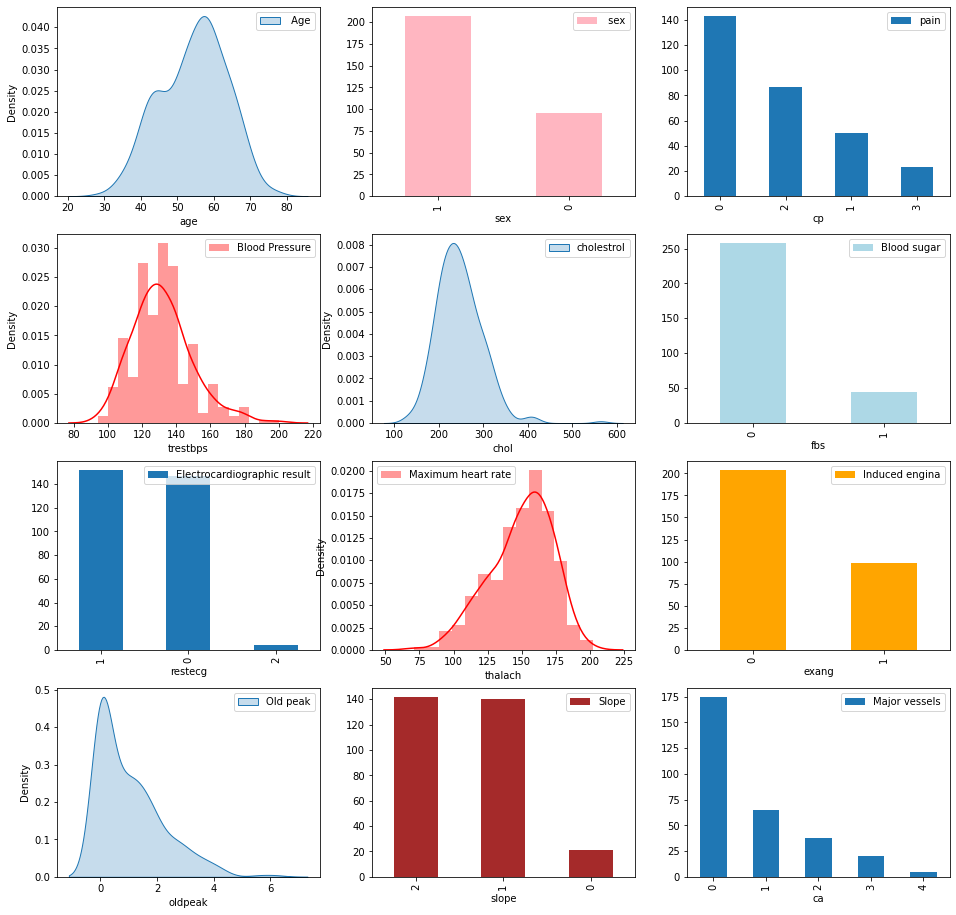

In [67]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

In [68]:
#Age distribution based on heart disease

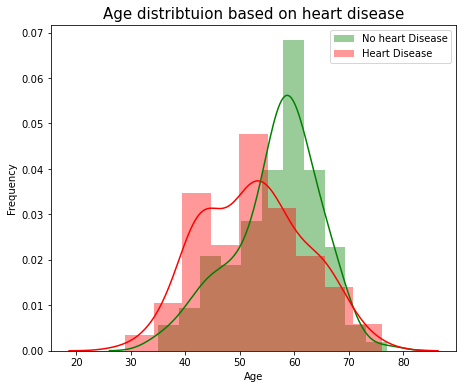

In [69]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [70]:
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.60144927536232


In [71]:
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.4969696969697


In [72]:
#Heart disease frequency according to chest pain types

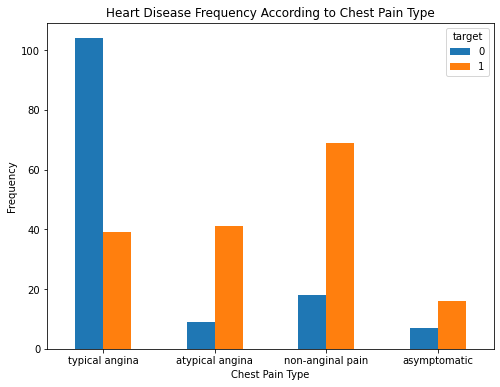

In [73]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [74]:
#Blood pressure distribution based on heart rate

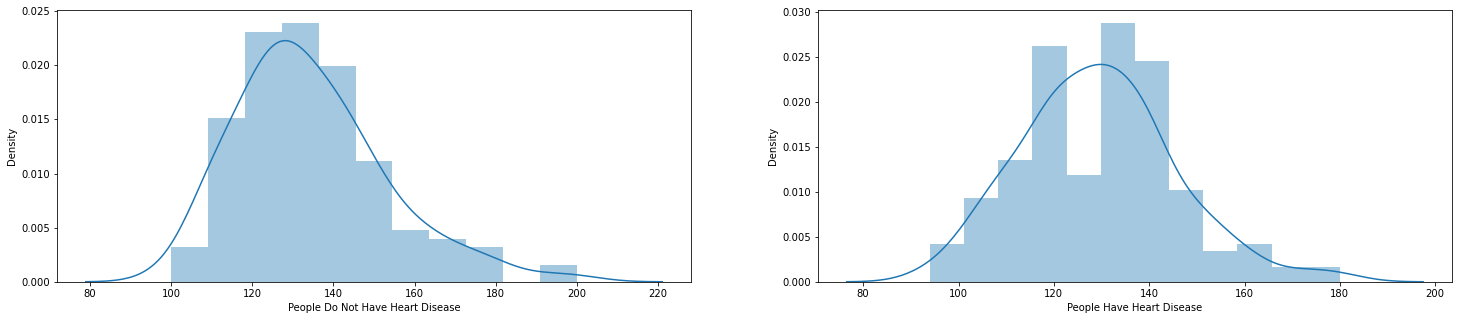

In [75]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [76]:
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.3985507246377


In [77]:
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.3030303030303


In [78]:
#Cholesterol distribution based on heart disease

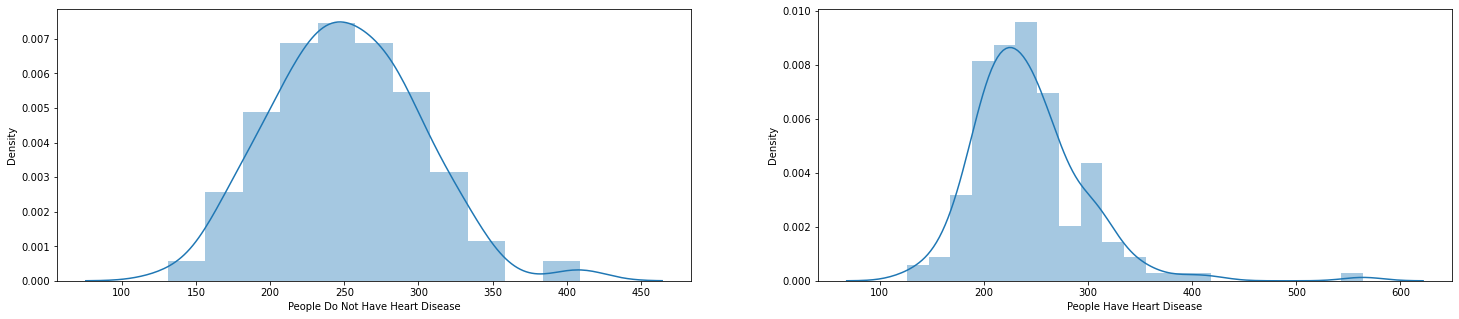

In [79]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [80]:
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.08695652173913


In [81]:
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  242.23030303030302


In [82]:
#Heart Disease Frequency According to Fasting Blood Sugar

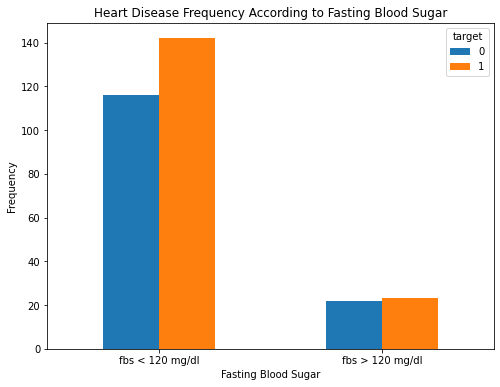

In [83]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [84]:
#Heart Disease Frequency According to Resting Electrocardiographic Results

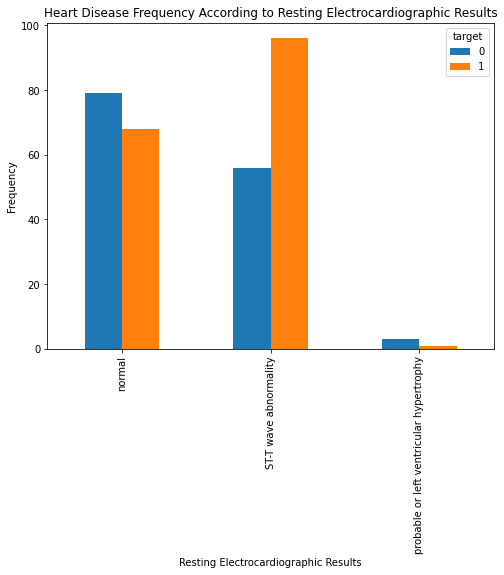

In [85]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

In [86]:
#Maximum heart rate distribution based on heart disease

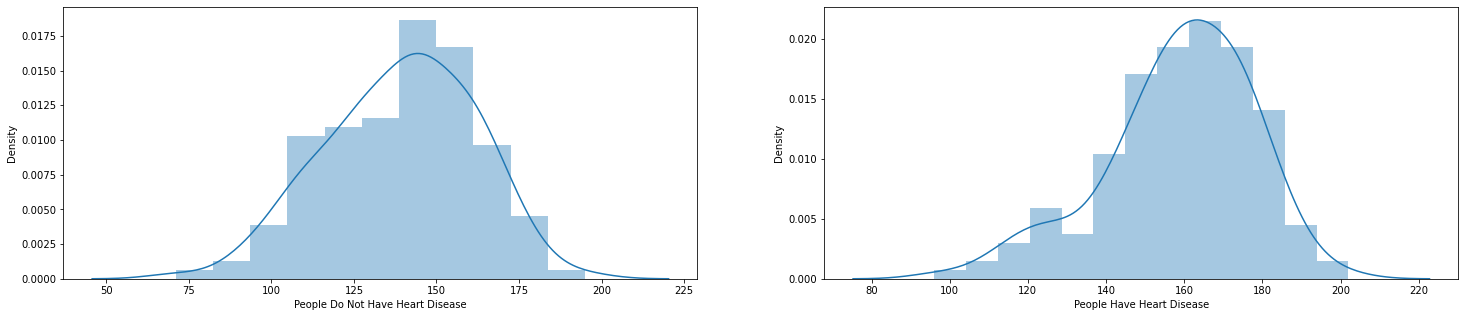

In [87]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [88]:
#ST depression distribution based on heart disease

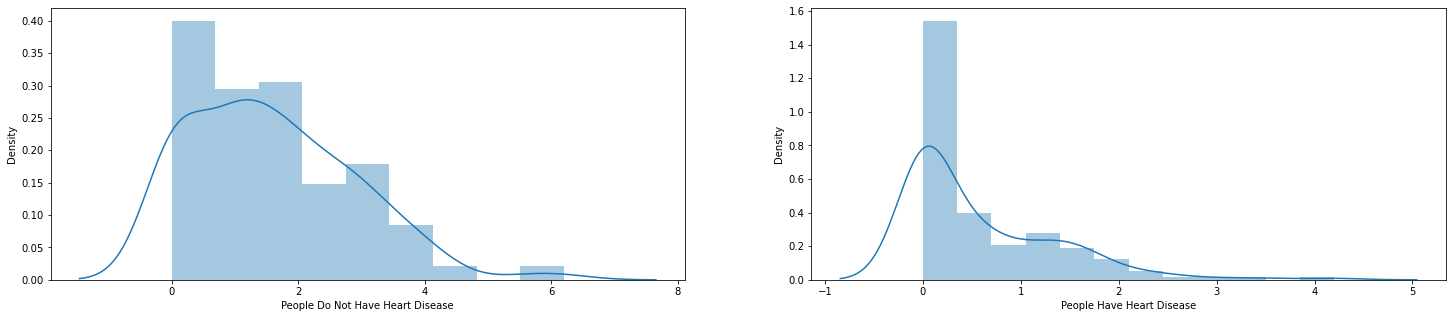

In [89]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [90]:
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.5855072463768118


In [91]:
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5830303030303029


In [92]:
#Heart Disease Frequency According to Exercise Induced Angina

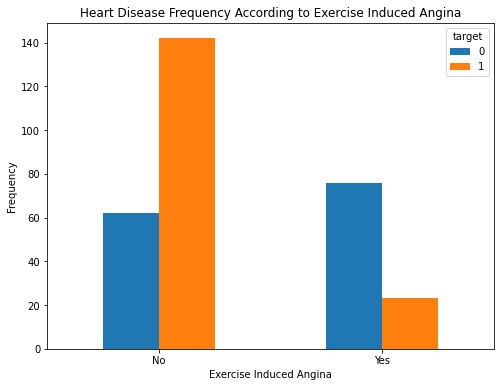

In [93]:
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [94]:
#Slope of the peak exercise ST segment based on the target

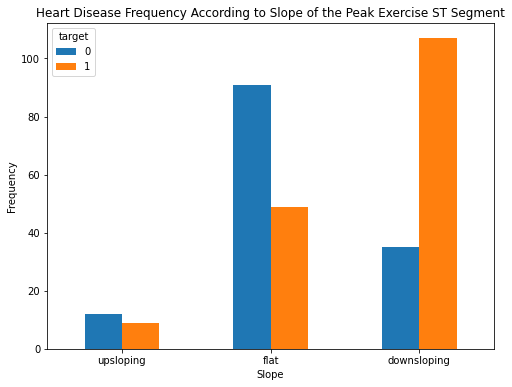

In [95]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [96]:
#Number of vessels based on the target

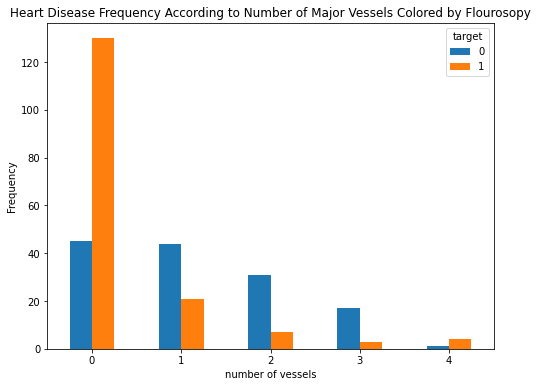

In [97]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [98]:
#Heart Disease Frequency According to Thalassemia

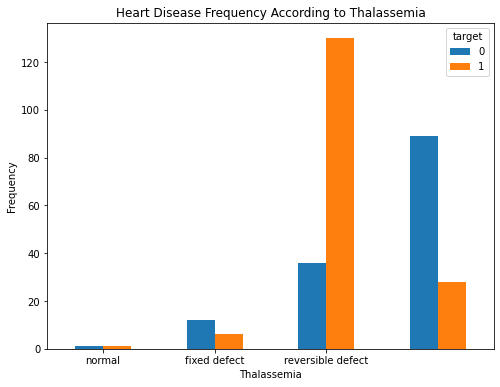

In [99]:
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

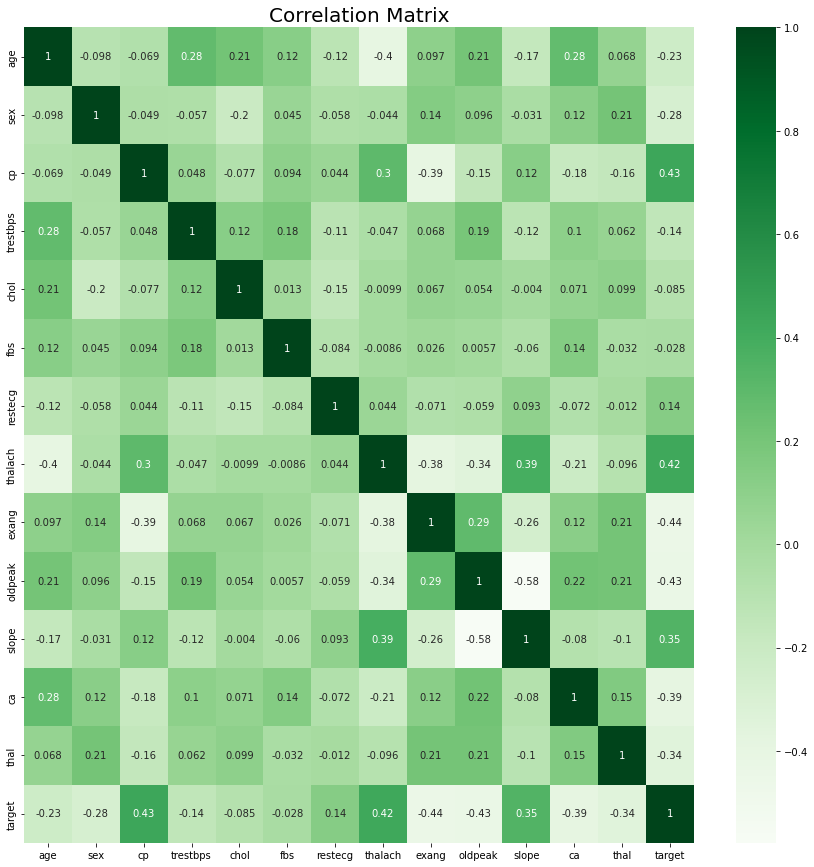

In [100]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

In [101]:
#Model building and traning

In [102]:
x= heart_df.drop(columns= 'target')
y= heart_df.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (227, 13), X_test size: (76, 13)


In [103]:
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

In [104]:
#K-nearest-neighbor classifier

In [105]:
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.8947368421052632

In [106]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76

Accuracy: 89.47%



In [107]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[31,  4],
       [ 4, 37]], dtype=int64)

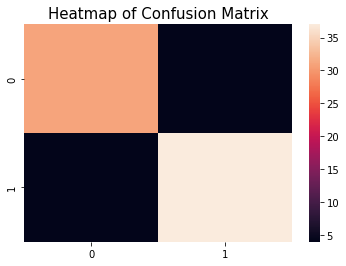

In [108]:
plt.title('Heatmap of Confusion Matrix', fontsize=15)
sns.heatmap(cm)
plt.show()

In [109]:
#Decison Tree Classifier

In [110]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

0.7631578947368421

In [111]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.81      0.73      0.77        41

    accuracy                           0.76        76
   macro avg       0.76      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76

Accuracy: 76.32%



In [112]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[28,  7],
       [11, 30]], dtype=int64)

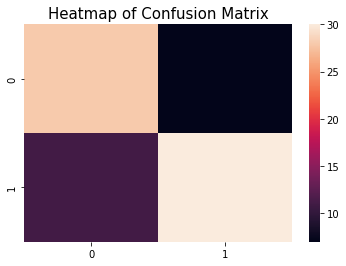

In [113]:
plt.title('Heatmap of Confusion Matrix', fontsize=15)
sns.heatmap(cm)
plt.show()

In [114]:
#Result of knn

In [115]:
Catagory=['No you dont have Heart Disease.','Yes you have Heart Disease.']

In [116]:
X_knn=np.array([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])
X_knn=scaler.transform(X_knn)
X_knn_prediction=Knn_model.predict(X_knn)

In [117]:
X_knn_prediction

array([1], dtype=int64)

In [118]:
print(Catagory[int(X_knn_prediction)])

Yes you have Heart Disease.


In [119]:
#Result of Decision Tree

In [120]:
X_DT=np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
X_DT=scaler.transform(X_DT)
X_DT_prediction=DT_model.predict(X_DT)

In [121]:
X_DT_prediction

array([1], dtype=int64)

In [122]:
print(Catagory[int(X_DT_prediction)])

Yes you have Heart Disease.


In [123]:
#Best algorithm

In [124]:
algorithms=['Decision Tree','KNN']

In [125]:
scores=[DT_model.score(x_test_scaler,y_test),Knn_model.score(x_test_scaler,y_test)]

<AxesSubplot:>

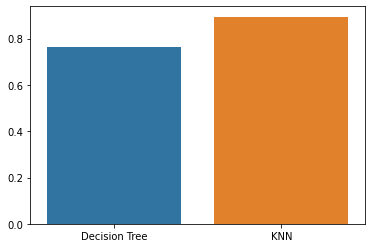

In [126]:
sns.barplot(algorithms,scores)

In [127]:
import pickle

In [128]:
filename = 'jugad-model.pkl'

In [129]:
pickle.dump(Knn_model, open(filename, 'wb'))